# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [10]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = 'multi_round_17params'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
#x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu
/home/ubuntu/results


In [11]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  0.0


                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 100 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  4.9751243781094526e-05
acceptance rate:  9.966777408637874e-05
acceptance rate:  9.975062344139652e-05
acceptance rate:  0.00011976047904191617
acceptance rate:  9.983361064891847e-05
acceptance rate:  9.985734664764622e-05
acceptance rate:  9.987515605493134e-05
acceptance rate:  0.00011098779134295228
acceptance rate:  0.00010989010989010989
acceptance rate:  9.990917347865577e-05
acceptance rate:  9.991673605328893e-05
acceptance rate:  9.223674096848578e-05
acceptance rate:  8.565310492505354e-05
acceptance rate:  7.994670219853431e-05
acceptance rate:  7.495315427857589e-05
acceptance rate:  7.054673721340387e-05
acceptance rate:  7.773459189339256e-05
acceptance rate:  7.364544976328249e-05
acceptance rate:  6.996501749125437e-05
acceptance rate:  6.663493574488339e-05
acceptance rate:  6.360745115856429e-05
acceptance rate:  6.51890482398957e-05
acceptance rate:  6.663890045814244e-05
acceptance rate:  6.797281087564974e-05
acceptance rate

In [12]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [13]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam sizeparam sizeparam sizeparam sizeparam size  param size  17 1717 17param size 

17
 17early stop
17
early stop17
early stop  

early stop200.0early stop  200.0early stop200.0
 early stopearly stop

 200.0 200.0param size param size  200.0param size 200.0 

 [Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

param size 17200.0 17 
param size 

param size 
17param size  param size  17
 
171717


 17
num_params 17
joblib will run over 1 jobsnum_params
 num_params 17num_paramsnum_paramsnum_params  17
num_params num_params
joblib will run over 1 jobs1717
  17
1717
joblib will run over 1 jobs

joblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobs
joblib will run over 1 jobs

joblib will run over 1 jobs

Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/u

num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 12.06710949 12.03239276
 11.99767436]
param size 17
early stop 200.0
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  5.8min
param size  17
num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ...  9.69278152  9.66222661
  9.63167798]
param size 17
early stop 200.0[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  5.8min

param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
obs Building the NEURON model[-0.59760178 -0.59840714 -0.59920666 ...  9.28202304  9.25177274
  9.22153943]

param size 17
early stop 200.0
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  5.8min
param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores[

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0

Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation ti

Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...Simulation time: 150.0 ms...

Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation tim

Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 12.2528077  12.21018487
 12.16759432]
param size 17
early stop 200.0
[Parallel(n_jobs=8)]: Done  41 tasks      | elapsed: 35.3min
param size  17
num_params 17obs
 [-0.59760178 -0.59840714 -0.59920666 ... 10.94468229 10.90947276
 10.87427544]joblib will run over 1 jobs

param size 17
early stop 200.0[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 35.3min

param size  17
obs [-0.59760178 -0.59840714 -0.59920666 ... 10.03708472

 10.90845906]
param size 17
early stop 200.0[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 41.5min

param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON model
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 11.29394739 11.25745319
 11.2209716 ]
param size 17
early stop [Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 41.6min
200.0
param size  17
num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 14.83048289 14.78198341
 14.73350548]
param size 17
early stop [Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 41.6min
200.0
param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 10.6066048  10.5721067
 10.53762943]
param size 17
early stop [Parallel(n_jobs=8)]: Done  55 tasks      | elapsed: 41.7min
200.0
param size  17
Building the NEURON model


num_params 17
joblib will run over 1 jobs
[Done]
running trial 1 on 1 cores
Building the NEURON model
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
[Done]
Simulation time: 10.0 ms...running trial 1 on 1 cores

Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0

Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...Simulation time: 60.0 ms...

Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100

Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...Simulation time: 100.0 ms...

Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...Simulation time: 130.0 ms...

Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time:

Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...obs
 [-0.59760178 -0.59840714 -0.59920666 ... 10.13447202 10.10148085
 10.06850536]
param size 17
early stop [Parallel(n_jobs=8)]: Done  89 tasks      | elapsed: 70.8min
200.0
param size  17
num_params 17
joblib will run over 1 jobs
obs [-0.575677   -0.57563007 -0.57557415 ..

In [ ]:
torch.save(s_x, 's_x_fake_snpe.pt')

In [14]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [15]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param sizeparam sizeparam size param sizeparam sizeparam size  param size 17param size1717
    17
early stop
17early stop 1717
17
early stop

 early stop200.0early stop  
early stop
200.0early stopearly stop 200.0200.0param size  
 200.0
200.0  param size 200.0


17param size [Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
 200.0param size param size 
 param size  1717

  
param size 17param size 

  171717

17

num_paramsnum_params num_params 17num_params17num_params  num_paramsnum_params

1717 num_params 
 
joblib will run over 1 jobsjoblib will run over 1 jobs 171717
joblib will run over 1 jobs

joblib will run over 1 jobs

17


joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs


joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

 34.21929213]

param size 17
early stop 200.0[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  5.7min

num_paramsparam size   17
17
joblib will run over 1 jobs
num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 30.72710705 30.62631555
 30.52554562]
param sizeBuilding the NEURON model 17

early stop 200.0
param size [Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  5.7min
 17
num_params 17
joblib will run over 1 jobs
obs [-0.46170926 -0.4602063  -0.45865635 ... 46.44527343 46.30645074
 46.1675464 ]
param size 17
early stop 200.0[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  5.7min

param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running

Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...Simulation time: 20.0 ms...

Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.

Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation 

Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation tim

Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...obs
 [ 0.32650041  0.33619751  0.34621718 ... 48.88364123 48.72036431
 48.55713209]
param size 17
early stop [Parallel(n_jobs=8)]: Done  41 tasks      | elapsed: 36.1min
200.0
param size  17
num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 55.066705   54.85870367
 54.65096493]
param size 17
Simulation time: 190.0 ms...early stop
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 36.1min
 200.0
param size Simulation time: 190.0 ms... 17

num_params 17
joblib will run over 1 jobs
Building the NEURON model
Building the NEUR

 22.01793119]
param size 17
early stop 200.0
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 42.7min
param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
obs [ 0.09099536  0.09838557  0.10576179 ... 32.18045179 32.06746831
 31.95459442]
param size 17
early stop 200.0
param size  17[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 42.8min

num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 31.94366477 31.84546202
 31.74726384]
param sizeobs  17[ 0.42400414  0.43633173  0.44904026 ... 46.45344435 46.26651576
 46.07989081]

early stopparam size 200.0 
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 42.9min
[Parallel(n_jobs=8)]: Done  55 tasks      | elapsed: 42.9min
param size 17 
17early stop
 200.0
param size  17
num_params 17
joblib will run over 1 jobsnum_params
 17
joblib will run over 1 jobs
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 21.59498989 21.521

Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
[Done]Simulation time: 0.03 ms...

running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simula

Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...Simulation time: 70.0 ms...

Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 10

Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 1

Simulation time: 180.0 ms...Simulation time: 130.0 ms...

Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 45.96325922 45.79745046
 45.63180961]
param size 17
early stop 200.0
param size [Parallel(n_jobs=8)]: Done  89 tasks      | elapsed: 58.9min
 17
Simulation time: 150.0 ms...
num_params 17
joblib will run over 1 jobs
Simulation time: 190.0 ms...
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
obs [ 0.38673737  0.39844518  0.41056694 ... 44.40098024 44.25655823
 44.11228542]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run ove

In [16]:
s_x_torch = torch.stack(([s_x[i] for i in range(39)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(39)]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



In [17]:
obs_real = torch.load('{}/obs_real.pt'.format(file))

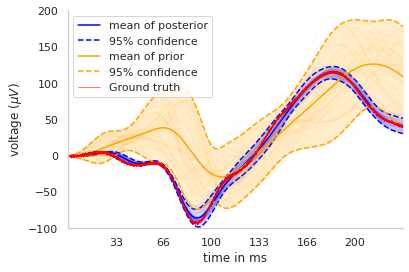

In [18]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')
sns.set_context('notebook')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x[0:40]:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior[0:40]:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, label='Ground truth', color='red', linewidth=0.5)

plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])


sns.despine()

plt.legend()

In [19]:
obs_real = torch.load('{}/obs_real.pt'.format(file))

In [20]:
plt.save('thesis_4_7.png')

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'